In [128]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

from distgen.generator import Generator
from distgen.plot import plot_dist2d

import numpy as np
from matplotlib import pyplot as plt
import yaml

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


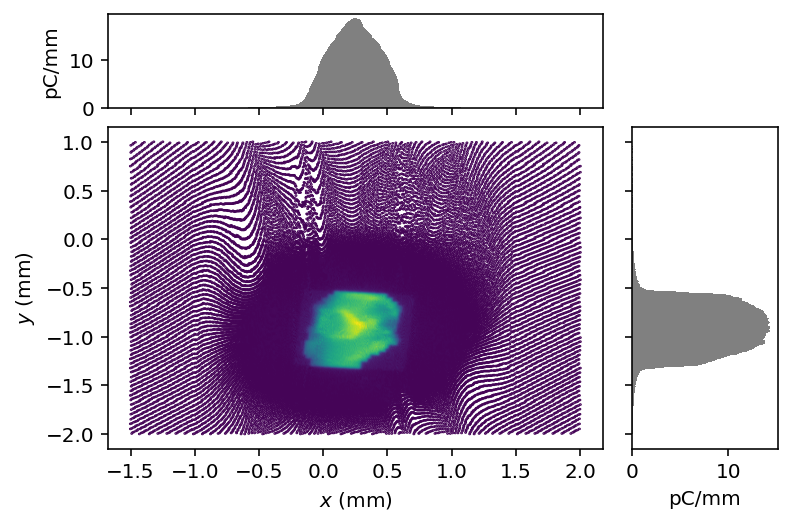

In [138]:
#DCM
gen=Generator('data/dcm_field1_in.yaml',verbose=0)
gen.run()
gen.particles.plot('x','y')

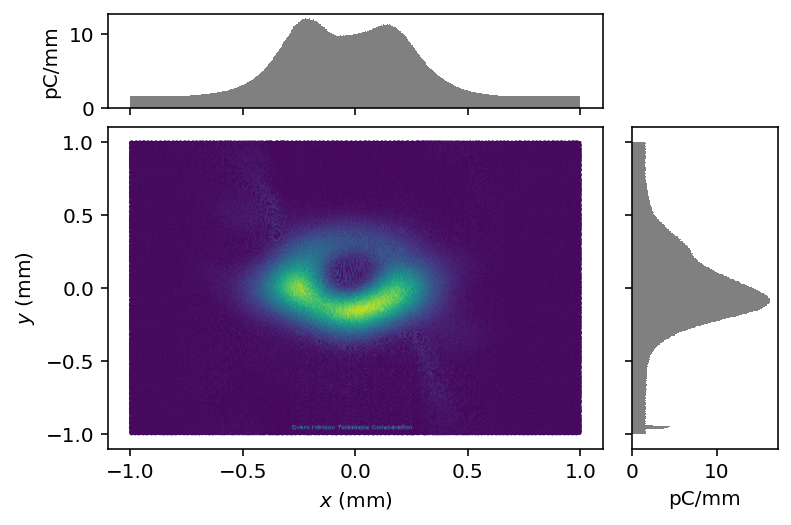

In [130]:
#JPEG
gen=Generator('data/jpg.blackhole.image.in.yaml',verbose=0)
gen.run()
gen.particles.plot('x','y')

In [131]:
shape = (100,100)
mask = np.zeros(shape)
mask[:shape[0]//2, :shape[1]//2] = 1

x = np.linspace(-2, 2, mask.shape[1])
y = np.linspace(-1, 1, mask.shape[1])

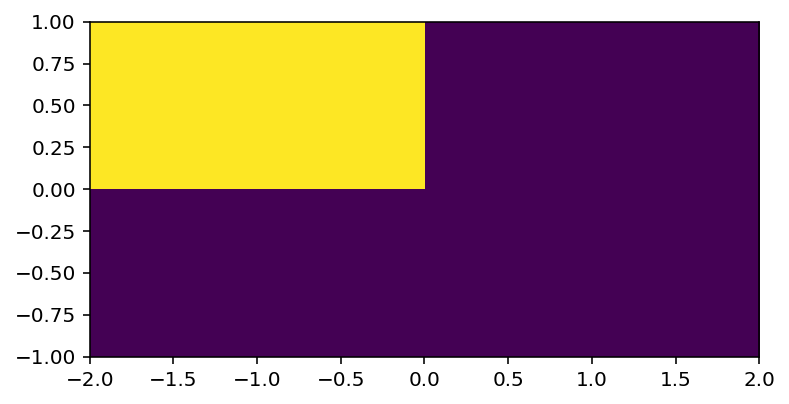

In [132]:
plt.imshow(mask, extent=(x.min(), x.max(), y.min(), y.max()));

In [133]:
inputs ="""
n_particle: 100000
random_type: hammersley
start:
  MTE:
    units: meV
    value: 150
  type: cathode
total_charge:
  units: pC
  value: 1
"""
inputs = yaml.safe_load(inputs)

In [134]:
Mask = {
    'type': 'image2d',
    'x': {'value':x, 'units':'mm'},
    'y': {'value':y, 'units':'mm'},
    'P':mask
}

Laser = {
    'file': 'data/seaturtle.jpeg',
    'type': 'file2d',
    'min_x': {'value': -2, 'units': 'mm'},
    'max_x': {'value': +2, 'units': 'mm'},
    'min_y': {'value': -1, 'units': 'mm'},
    'max_y': {'value': +1, 'units': 'mm'},
    'threshold': 0.0
}

In [135]:
inputs['xy_dist'] = {'type':'product',
                    'dists':{
                        'QE':Mask,
                        'Laser':Laser,
                    }}

In [136]:
gen = Generator(inputs)
gen.run()

<ParticleGroup with 100000 particles at 0x7f9136fb78b0>

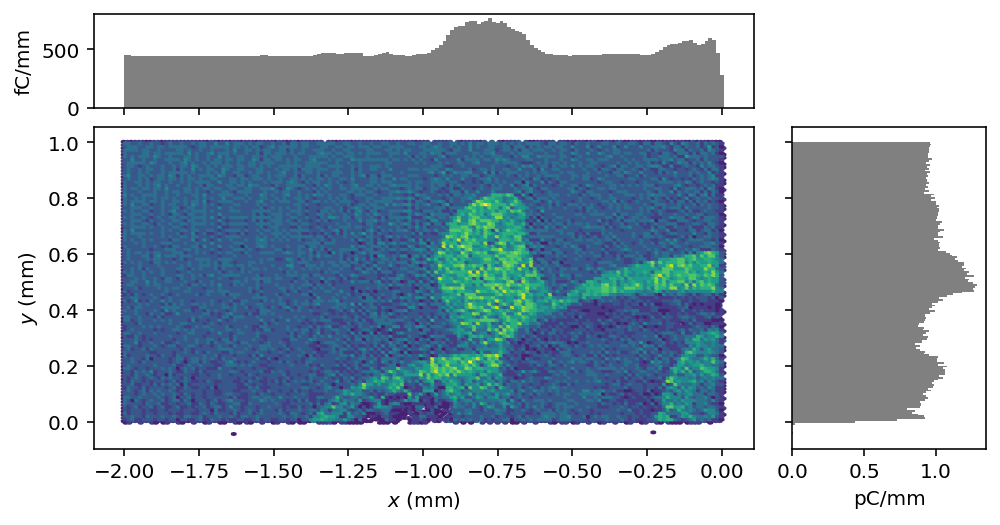

In [137]:
gen.particles.plot('x', 'y', figsize=(8,4))